In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Load the data we are going to work

In [2]:
#Use pd.read_csv to read the csv file
df = pd.read_csv('walmart_sales.csv')

In [3]:
#Drop the first column since it is not necessary in our analysis
df.drop(columns = df.columns[0], inplace = True)

In [4]:
#See the first 5 rows to see if the dataset looks like what we expected
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Close,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,53.450001,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,211.096358,8.106,53.450001,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,211.096358,8.106,53.450001,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,211.096358,8.106,53.450001,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,211.096358,8.106,53.450001,A,151315


In [5]:
df.shape

(409727, 12)

# Data Visualization

In [6]:
#Plot an histogram of the variables we are interested on

In [7]:
'''I am interested on the weekly sales as my dependant variable since it is what we are trying to predict'''

'I am interested on the weekly sales as my dependant variable since it is what we are trying to predict'

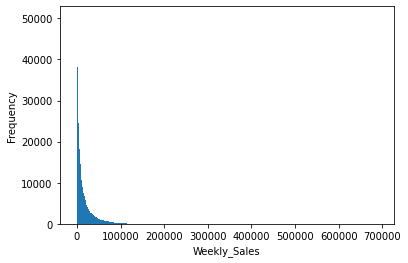

In [8]:
#Plot a histogram of the weekly_sales variables
n_bins = np.sqrt(len(df['Weekly_Sales']))
n_bins = int(n_bins)
plt.hist(df['Weekly_Sales'], bins = n_bins)
plt.xlabel('Weekly_Sales')
plt.ylabel('Frequency')
plt.show()

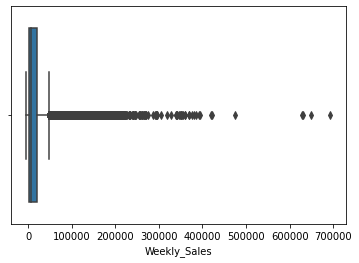

In [9]:
#Plot a boxplot
sns.boxplot(x = 'Weekly_Sales', data = df)

In [10]:
'''From the box plot, we are able to see that there may be some outliers'''

'From the box plot, we are able to see that there may be some outliers'

### Removing outliers 

In [11]:
#Process to remove outliers
mean = df['Weekly_Sales'].mean()
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)

In [12]:
IQR = Q3 - Q1

In [13]:
df = df.loc[df['Weekly_Sales'] >= Q1 - 1.5*IQR]
df = df.loc[df['Weekly_Sales'] <= Q3 + 1.5*IQR]

In [14]:
df.shape

(375188, 12)

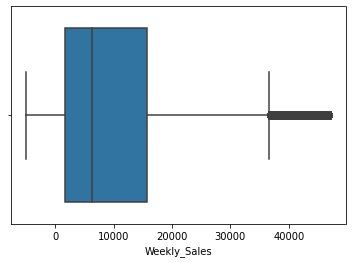

In [15]:
sns.boxplot(x = 'Weekly_Sales', data = df)

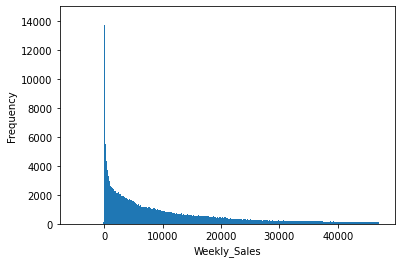

In [16]:
#Plot a histogram of the weekly_sales variables
n_bins = np.sqrt(len(df['Weekly_Sales']))
n_bins = int(n_bins)
plt.hist(df['Weekly_Sales'], bins = n_bins)
plt.xlabel('Weekly_Sales')
plt.ylabel('Frequency')
plt.show()

In [17]:
'''It does not look like the weekly sales follow a normal distribution based on the histogram'''

'It does not look like the weekly sales follow a normal distribution based on the histogram'

In [18]:
df_2 = df.drop(columns = {'Date','Store', 'Dept', 'IsHoliday', 'Type', 'Size'})

In [19]:
#Plot a correlation heat map to see the correlation among all the variables
df_corr = df_2.corr()

In [20]:
df_corr

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Close
Weekly_Sales,1.000000,0.001416,0.007062,-0.037607,-0.009346,-0.003274
Temperature,0.001416,1.000000,0.143087,0.177008,0.101062,0.098519
Fuel_Price,0.007062,0.143087,1.000000,-0.168826,-0.029669,0.469201
CPI,-0.037607,0.177008,-0.168826,1.000000,-0.312462,0.063113
Unemployment,-0.009346,0.101062,-0.029669,-0.312462,1.000000,-0.216900
Close,-0.003274,0.098519,0.469201,0.063113,-0.216900,1.000000


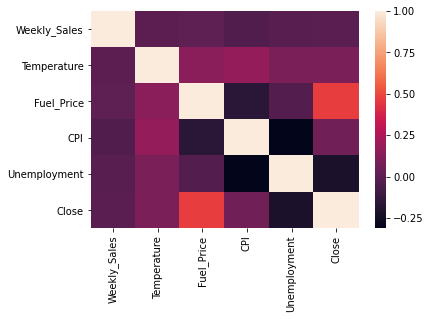

In [21]:
sns.heatmap(df_corr)

'''Looks like the variables that are more correlated are the Fuel_Price and the Close price of the stock. On the other hand, there is no a clear correlation between the sales and any of the variables'''


### Relation among the departments and the weekly sales

In [22]:
#We are going to group by department and take the sum of all the weekly sales
df_dept_group = df.groupby('Dept').agg({'Weekly_Sales':'sum'})

In [23]:
#Ascending themm from the highest to the lowest and save as a data frame
df_dept_sorted = pd.DataFrame(df_dept_group['Weekly_Sales'].sort_values(ascending = False))

In [24]:
#See the 10 most important departments in terms of sales
df_dept_sorted.head(10)

,Weekly_Sales
Dept,
8,1.326477e+08
13,1.316892e+08
4,1.314791e+08
79,1.193931e+08
46,1.140393e+08
23,1.106379e+08
10,1.047456e+08
40,1.014016e+08
7,1.008975e+08


By taking into consideration the sales, the departments that look more important are the following: Departments 8, 13, 4, 79, 46, 23, 10, 40, 7, and 1.

#### Plot visualizations between the department and the weekly sales

In [25]:
#Each loc has the department we are interested to know how they are distributed
df_dept8 = df.loc[df['Dept'] == 8]
df_dept13 = df.loc[df['Dept'] == 13]
df_dept4 = df.loc[df['Dept'] == 4]
df_dept79 = df.loc[df['Dept'] == 79]
df_dept46 = df.loc[df['Dept'] == 46]
df_dept23 = df.loc[df['Dept'] == 23]
df_dept10 = df.loc[df['Dept'] == 10]
df_dept40 = df.loc[df['Dept'] == 40]
df_dept7 = df.loc[df['Dept'] == 7]
df_dept1 = df.loc[df['Dept'] == 1]

In [26]:
#Have a complete data frame to see possible correlations
df_dept = pd.concat([df_dept8, df_dept13, df_dept4, df_dept79, df_dept46, df_dept23, df_dept10, df_dept40, df_dept7,
                    df_dept1], axis = 0)

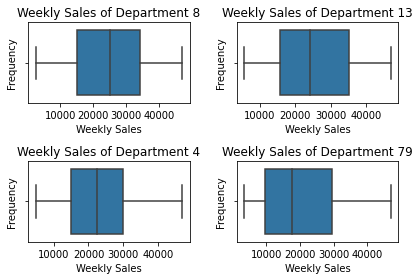

In [27]:
#Plot each department weekly sales' distribution 
plt.subplot(2,2,1)
sns.boxplot(df_dept8['Weekly_Sales'], data = df_dept8)
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Weekly Sales of Department 8')
plt.subplot(2,2,2)
sns.boxplot(df_dept13['Weekly_Sales'], data = df_dept13)
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Weekly Sales of Department 13')
plt.subplot(2,2,3)
sns.boxplot(df_dept4['Weekly_Sales'], data = df_dept4)
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Weekly Sales of Department 4')
plt.subplot(2,2,4)
sns.boxplot(df_dept79['Weekly_Sales'], data = df_dept79)
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Weekly Sales of Department 79')
plt.tight_layout()
plt.show()

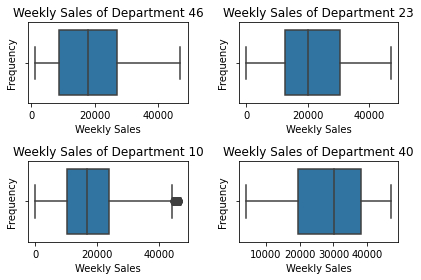

In [28]:
plt.subplot(2,2,1)
sns.boxplot(df_dept46['Weekly_Sales'], data = df_dept46)
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Weekly Sales of Department 46')
plt.subplot(2,2,2)
sns.boxplot(df_dept23['Weekly_Sales'], data = df_dept23)
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Weekly Sales of Department 23')
plt.subplot(2,2,3)
sns.boxplot(df_dept10['Weekly_Sales'], data = df_dept10)
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Weekly Sales of Department 10')
plt.subplot(2,2,4)
sns.boxplot(df_dept40['Weekly_Sales'], data = df_dept40)
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Weekly Sales of Department 40')
plt.tight_layout()
plt.show()

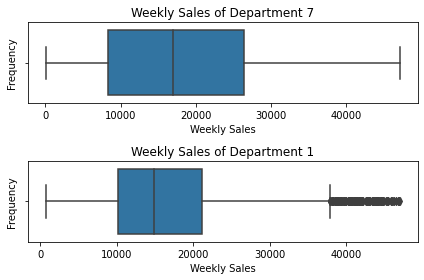

In [29]:
plt.subplot(2,1,1)
sns.boxplot(df_dept7['Weekly_Sales'], data = df_dept7)
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Weekly Sales of Department 7')
plt.subplot(2,1,2)
sns.boxplot(df_dept1['Weekly_Sales'], data = df_dept1)
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Weekly Sales of Department 1')
plt.tight_layout()
plt.show()

Based on the boxplots we just made for the 10 most important departments regarding weekly sales, we can see they do not follow a normal distribution just like in overall the boxplot's graphic of the weekly sales with all de department included. This is an important thing to take into consideration.

#### Correlation among the most important departments and weekly sales

In [31]:
#Extract the columns I am intereted. In this case, department and weekly sales
df_dept2 = df_dept[['Dept', 'Weekly_Sales']]

In [33]:
#Convert the department into dummies variables, and concat it to the department data frame to see correlations
df_dept_dummies = pd.get_dummies(df_dept2['Dept'])
df_dept2 = df_dept2.drop(columns = 'Dept')
df_dept2 = pd.concat([df_dept2, df_dept_dummies], axis = 1)

In [34]:
#Create a correlation matrix
corr_matrix = df_dept2.corr()
corr_matrix

,Weekly_Sales,1,4,7,8,10,13,23,40,46,79
Weekly_Sales,1.000000,-0.127341,0.064364,-0.092551,0.102847,-0.108940,0.119040,0.004780,0.175213,-0.064804,-0.022000
1,-0.127341,1.000000,-0.119479,-0.119761,-0.116092,-0.124032,-0.113942,-0.114352,-0.092017,-0.124205,-0.122313
4,0.064364,-0.119479,1.000000,-0.115719,-0.112174,-0.119846,-0.110096,-0.110493,-0.088911,-0.120012,-0.118185
7,-0.092551,-0.119761,-0.115719,1.000000,-0.112438,-0.120128,-0.110356,-0.110753,-0.089121,-0.120295,-0.118463
8,0.102847,-0.116092,-0.112174,-0.112438,1.000000,-0.116449,-0.106975,-0.107361,-0.086391,-0.116610,-0.114835
10,-0.108940,-0.124032,-0.119846,-0.120128,-0.116449,1.000000,-0.114292,-0.114703,-0.092299,-0.124586,-0.122688
13,0.119040,-0.113942,-0.110096,-0.110356,-0.106975,-0.114292,1.000000,-0.105372,-0.084791,-0.114450,-0.112707
23,0.004780,-0.114352,-0.110493,-0.110753,-0.107361,-0.114703,-0.105372,1.000000,-0.085096,-0.114863,-0.113113
40,0.175213,-0.092017,-0.088911,-0.089121,-0.086391,-0.092299,-0.084791,-0.085096,1.000000,-0.092428,-0.091020
46,-0.064804,-0.124205,-0.120012,-0.120295,-0.116610,-0.124586,-0.114450,-0.114863,-0.092428,1.000000,-0.122859


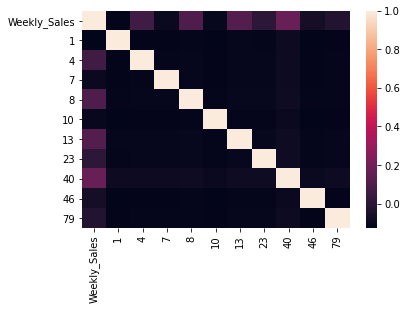

In [35]:
#Plot a heatmap
sns.heatmap(corr_matrix)

By loooking the heatmap and the correlation matrix, we can conclude there is not a significance correlation between weekly sales and the 10 departments with highest weekly sales.The department that looks to have more correlation is the department 13, but is not significant.

## Relation among the stores and the weekly sales

In [36]:
#Group by store and sum the weekly sales per each store
df_store_group = df.groupby('Store').agg({'Weekly_Sales':'sum'})

In [37]:
#Sort them from the highest to the lowest and see the 10 most important stores 
df_store_sorted = pd.DataFrame(df_store_group['Weekly_Sales'].sort_values(ascending = False))

In [38]:
#See the results
df_store_sorted.head(10)

,Weekly_Sales
Store,
23,1.288370e+08
6,1.260801e+08
11,1.212156e+08
27,1.204617e+08
2,1.178480e+08
13,1.155599e+08
20,1.150738e+08
28,1.145824e+08
19,1.125306e+08


#### Plot of the visualizations of the stores and the weekly sales

In [39]:
#Each loc has the information of each of the most important stores to plot
df_store23 = df.loc[df['Store'] == 23]
df_store6 = df.loc[df['Store'] == 6]
df_store11 = df.loc[df['Store'] == 11]
df_store27 = df.loc[df['Store'] == 27]
df_store2 = df.loc[df['Store'] == 2]
df_store13 = df.loc[df['Store'] == 13]
df_store20 = df.loc[df['Store'] == 20]
df_store28 = df.loc[df['Store'] == 28]
df_store19 = df.loc[df['Store'] == 19]
df_store1 = df.loc[df['Store'] == 1]

In [40]:
#Have a complete data frame to see possible correlations
df_store = pd.concat([df_store23, df_store6, df_store11, df_store27, df_store2, df_store13, df_store20, df_store28, 
                     df_store19, df_store1], axis = 0)

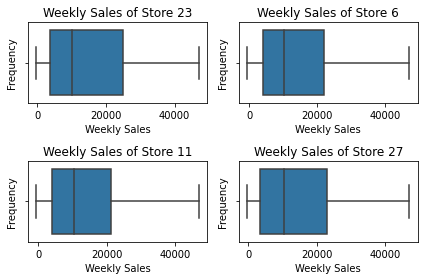

In [41]:
#Plot each distribution
plt.subplot(2,2,1)
sns.boxplot(df_store23['Weekly_Sales'], data = df_store23)
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Weekly Sales of Store 23')
plt.subplot(2,2,2)
sns.boxplot(df_store6['Weekly_Sales'], data = df_store6)
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Weekly Sales of Store 6')
plt.subplot(2,2,3)
sns.boxplot(df_store11['Weekly_Sales'], data = df_store11)
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Weekly Sales of Store 11')
plt.subplot(2,2,4)
sns.boxplot(df_store27['Weekly_Sales'], data = df_store27)
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Weekly Sales of Store 27')
plt.tight_layout()
plt.show()

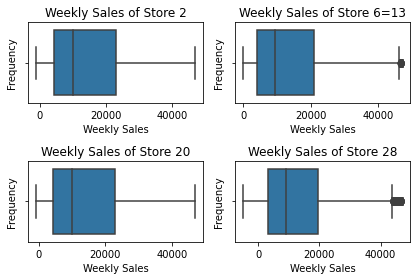

In [42]:
plt.subplot(2,2,1)
sns.boxplot(df_store2['Weekly_Sales'], data = df_store2)
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Weekly Sales of Store 2')
plt.subplot(2,2,2)
sns.boxplot(df_store13['Weekly_Sales'], data = df_store13)
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Weekly Sales of Store 6=13')
plt.subplot(2,2,3)
sns.boxplot(df_store20['Weekly_Sales'], data = df_store20)
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Weekly Sales of Store 20')
plt.subplot(2,2,4)
sns.boxplot(df_store28['Weekly_Sales'], data = df_store28)
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Weekly Sales of Store 28')
plt.tight_layout()
plt.show()

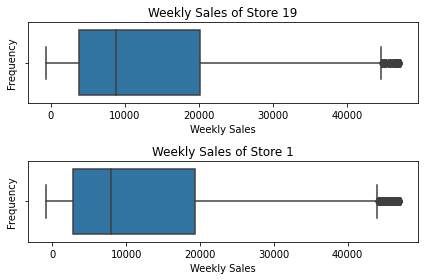

In [43]:
plt.subplot(2,1,1)
sns.boxplot(df_store19['Weekly_Sales'], data = df_store19)
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Weekly Sales of Store 19')
plt.subplot(2,1,2)
sns.boxplot(df_store1['Weekly_Sales'], data = df_store1)
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Weekly Sales of Store 1')
plt.tight_layout()
plt.show()

As we can see on the store distribution sales, all of them follows the same distribution than the weekly sales distribution. 

#### Correlation among the store and the weekly sales

In [69]:
#Extract the columns I am intereted. In this case, department and weekly sales
df_store2 = df_store[['Store', 'Weekly_Sales']]

In [72]:
#Convert the department into dummies variables, and concat it to the department data frame to see correlations
df_store_dummies = pd.get_dummies(df_store2['Store'])
df_store2 = df_store2.drop(columns = 'Store')
df_store2 = pd.concat([df_store2, df_store_dummies], axis = 1)

In [74]:
#Calculate the correlation matrix
corr_matrix = df_store2.corr()

In [75]:
#See the values
corr_matrix

,Weekly_Sales,1,2,6,11,13,19,20,23,27,28
Weekly_Sales,1.000000,-0.029251,0.011596,0.019971,-0.002279,0.001570,-0.024941,0.017594,0.020461,0.012834,-0.026177
1,-0.029251,1.000000,-0.109937,-0.112834,-0.114009,-0.110388,-0.113263,-0.107496,-0.114161,-0.111101,-0.114579
2,0.011596,-0.109937,1.000000,-0.109683,-0.110825,-0.107305,-0.110100,-0.104495,-0.110973,-0.107999,-0.111380
6,0.019971,-0.112834,-0.109683,1.000000,-0.113745,-0.110132,-0.113000,-0.107247,-0.113896,-0.110844,-0.114314
11,-0.002279,-0.114009,-0.110825,-0.113745,1.000000,-0.111279,-0.114177,-0.108364,-0.115082,-0.111999,-0.115504
13,0.001570,-0.110388,-0.107305,-0.110132,-0.111279,1.000000,-0.110551,-0.104923,-0.111427,-0.108441,-0.111836
19,-0.024941,-0.113263,-0.110100,-0.113000,-0.114177,-0.110551,1.000000,-0.107655,-0.114329,-0.111265,-0.114748
20,0.017594,-0.107496,-0.104495,-0.107247,-0.108364,-0.104923,-0.107655,1.000000,-0.108509,-0.105601,-0.108907
23,0.020461,-0.114161,-0.110973,-0.113896,-0.115082,-0.111427,-0.114329,-0.108509,1.000000,-0.112148,-0.115658
27,0.012834,-0.111101,-0.107999,-0.110844,-0.111999,-0.108441,-0.111265,-0.105601,-0.112148,1.000000,-0.112559


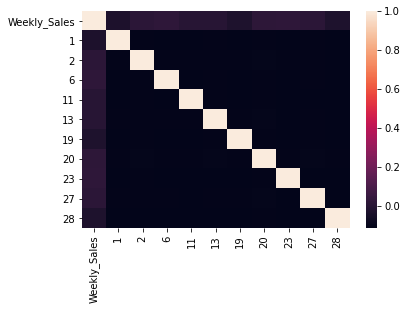

In [76]:
#Plot a heatmap
sns.heatmap(corr_matrix)

Same than correlation, we are not able to identify a clear correlation between weekly sales and number of stores. All the values say to us stores and weekly sales is uncorrelated. 

# Hypothesis testing for departments

Hypothesis: Department 8 would tend to higher mean on sales than department 13.

In [98]:
#See if the length of departments are the same to see if in case I can do a permutation test
print('The length of department 8 is:', len(df_dept8), 'and the length of department 13 is:', len(df_dept13))

The length of department 8 is: 5389 and the length of department 13 is: 5210


The length of department 8 is not the same than department 13, so we are not doing a permutation test. Instead, we would use a bootstraping to see if we have results that are statistically significative.

In [81]:
#Define the department 8 array
dept8_array = df_dept8['Weekly_Sales'].values

In [83]:
#define the department 13 array
dept13_array = df_dept13['Weekly_Sales'].values

In [92]:
#Create a function to calculate the absolute difference between means
def diff_mean(array1, array2):
    return abs(np.mean(array1) - np.mean(array2))

In [97]:
# Calculate the absolute mean difference between department 8 and department 13
diff_mean(dept8_array, dept13_array)

661.7116016432119

In [106]:
#Define a function to do the bootstraping for sample 1
def sampler(data, n):
    return np.random.choice(data)   

In [107]:
#Define a function to do the bootstraping for sample 2
def sampler_2(data2, n2):
    return np.random.choice(data2, n2)

In [126]:
#Repite the experiment over and over again by calculating the difference between the means
number_tries = 2000
diff = np.empty(number_tries)
for i in range(number_tries):
        diff[i] = np.mean(sampler(dept8_array, len(dept8_array))) - np.mean(sampler_2(dept13_array, len(dept13_array)))

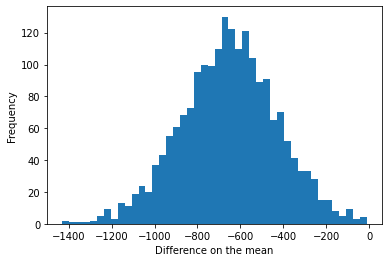

In [127]:
#Plot of the histogram to see the distribution of the means
n_bins = np.sqrt(len(diff))
n_bins = int(n_bins)
plt.hist(diff, bins = n_bins)
plt.xlabel('Difference on the mean')
plt.ylabel('Frequency')
plt.show()

In [140]:
#Calculation of the p-value for a difference of mean of 661.61
p_value = np.sum(abs(diff) < diff_mean(dept8_array, dept13_array))/number_tries       

In [145]:
#Either approve or not our null hypothesis
# If department 13 has more sales than department 8, that would mean a positive difference of means
p_value2 = np.sum(diff > 0)/number_tries

In [146]:
print('The p-value we got was:', p_value)

The p-value we got was: 0.5215


In [148]:
print('The probability to have the difference of means higher than 0 between department 8 and department 8 is:', p_value2)

The probability to have the difference of means higher than 0 between department 8 and department 8 is: 0.0


By doing a big number of repetition of test, we were able to conclude some things:
1. Department 8 would normally have lower mean of sales than department 13. By repeting the experiments several times, we always got department 8 has lower mean of weekly sales than department 13. But, on the other hand, department 8 has higher sum of sales which may indicate the presence of some high values or low and higher standard deviation since the mean is highly influenced by the extreme values
2. The difference between the means would not necessarily be approximately 661.7116016432119 since we got a p-value of 52.15% which indicates not statistical significance. 

In [ ]:
#Repeat the experiments using two other departments

In [155]:
#Create the arrays from the data frame
dept79_array = df_dept79['Weekly_Sales'].values
dept7_array = df_dept7['Weekly_Sales'].values

In [158]:
#Mean difference
diff_mean(dept79_array, dept7_array)

2470.1431322218414

In [156]:
#Repite the experiment over and over again by calculating the difference between the means
number_tries = 2000
diff = np.empty(number_tries)
for i in range(number_tries):
        diff[i] = np.mean(sampler(dept79_array, len(dept79_array))) - np.mean(sampler_2(dept7_array, len(dept7_array)))

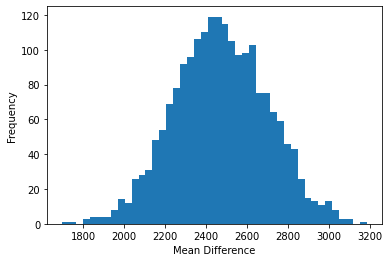

In [157]:
n_bins = np.sqrt(len(diff))
n_bins = int(n_bins)
plt.hist(diff, bins = n_bins)
plt.xlabel('Mean Difference')
plt.ylabel('Frequency')
plt.show()

In [159]:
#Calculation of our p-value
p_value = np.sum(diff < 0)/number_tries

In [160]:
print('The options to get department 7 with higher mean sales than department 79 is:', p_value)

The options to get department 7 with higher mean sales than department 79 is: 0.0


We can draw some conclusions:
1. Depending on the departments we want to choose, the mean difference could change and we can get some statistical results. Higher sum of sales would not mean the average would be higher. 
2. Since we should not make an overall conclusion for all departments, depending on the department, the difference of mean could either be significant or not. It would depend the department that were chosen. 

# Hypothesis Testing for stores

Hypothesis : 

In [162]:
#Define the arrays
store23_array = df_store23['Weekly_Sales'].values
store20_array = df_store20['Weekly_Sales'].values

In [163]:
#Repite the experiment over and over again by calculating the difference between the means
number_tries = 2000
diff = np.empty(number_tries)
for i in range(number_tries):
        diff[i] = np.mean(sampler(store23_array, len(store23_array))) - np.mean(sampler_2(store20_array, len(store20_array)))

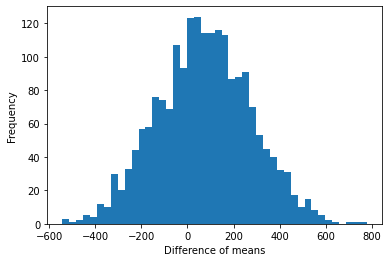

In [165]:
#Plot the histogram
plt.hist(diff, bins = n_bins)
plt.xlabel('Difference of means')
plt.ylabel('Frequency')
plt.show()

In [166]:
#We would calculate the probability that the mean of store 23 is higher than store 20
p_value = np.sum(diff > 0)/number_tries

In [167]:
print('The options to get store 23 with higher mean sales than department 20 is:', p_value)

The options to get store 23 with higher mean sales than department 20 is: 0.6455


We did not get any signficant statistical results that store 23 would have higher sales than store 20

In [168]:
#Do the same experiment with different stores

In [169]:
store27_array = df_store27['Weekly_Sales'].values
store28_array = df_store28['Weekly_Sales'].values

In [170]:
#Mean difference
diff_mean(store27_array, store28_array)

1436.8960017606933

In [171]:
#Repite the experiment over and over again by calculating the difference between the means
number_tries = 2000
diff = np.empty(number_tries)
for i in range(number_tries):
        diff[i] = np.mean(sampler(store27_array, len(store27_array))) - np.mean(sampler_2(store28_array, len(store28_array)))

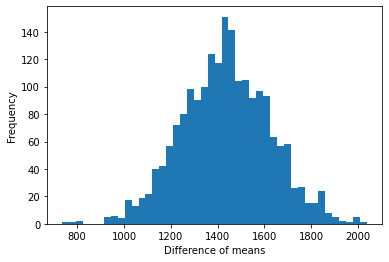

In [172]:
#Plot the histogram
plt.hist(diff, bins = n_bins)
plt.xlabel('Difference of means')
plt.ylabel('Frequency')
plt.show()

In [173]:
#Calculate the p-value for negative difference of means
p_value = np.sum(diff < 0)/number_tries

In [174]:
print('The options to get store 28 with higher mean sales than department 27 is:', p_value)

The options to get store 28 with higher mean sales than department 27 is: 0.0


We can draw the same conclusions we got from the department test hypothesis. If the results are statistical significant would depend on the department we choose.